<a href="https://colab.research.google.com/github/Spica08/Deep-Learning-from-Scratch/blob/main/3%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#setup
import numpy as np
import matplotlib.pyplot as plt
import pickle

# 3章 ニューラルネットワーク  
ニューラルネットワークは、パーセプトロンの適切な重みパラメータをデータから自動で学習できる。本章では、ニューラルネットワークの概要を学習する。

## 3.1 パーセプトロンからニューラルネットワークへ  

### 3.1.1 ニューラルネットワークの例  
ニューラルネットワークは、入力層、中間層(隠れ層)、出力層から成る。

### 3.1.2 パーセプトロンの復習  
略

### 3.1.3 活性化関数の登場  
入力信号を出力信号に変換する関数を活性化関数と呼ぶ。パーセプトロンの動作は、  
$a = b + w_1x_1 + w_2x_2$  
$y = h(a)(0(a<=0), 1(a>0))$   
の2つの式で表される。これは、重み付き信号の和の結果がaというノードになり、その結果が活性化関数h()によりyというノードに変換されることを表す。

## 3.2 活性化関数  
前章で見たh()は閾値を境にして出力が切り替わる関数で、「ステップ関数」や「階段関数」と呼ばれる。活性化関数には、別の関数を用いることができる。

### 3.2.1 シグモイド関数  
ニューラルネットワークでよく用いられる活性化関数のひとつが、以下の式で表されるシグモイド関数である。  
$h(x) = \frac{1}{1+exp(-x)}$  


### 3.2.2 ステップ関数の実装  
実際にステップ関数を実装してみる。

In [2]:
#ステップ関数の実装
def step_function(x):
  y = x > 0
  return y.astype(int)

In [3]:
#確認
print("x = [-1, 1, 2] : step_function(x) = {}".format(step_function(np.array([-1,1,2]))))

x = [-1, 1, 2] : step_function(x) = [0 1 1]


### 3.2.3 ステップ関数のグラフ  
ステップ関数をグラフで表してみる。


(-0.1, 1.1)

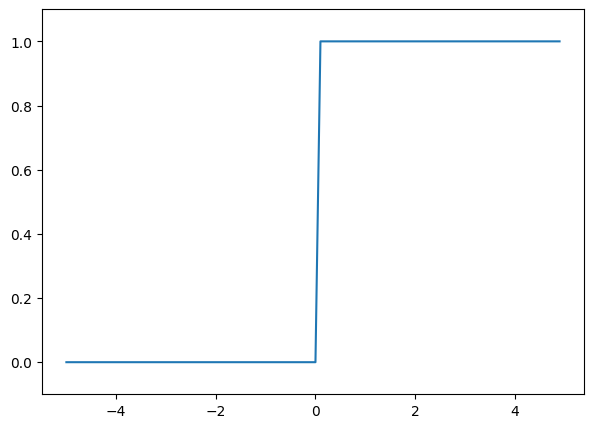

In [4]:
#ステップ関数の描画
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(x,y)
ax.set_ylim(-0.1, 1.1)

0を境に、出力が0から1に切り替わることが確認できた。

### 3.2.4 シグモイド関数の実装  
続いてシグモイド関数を実装してみる。

In [5]:
#シグモイド関数の実装
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [6]:
#確認
print("x = [-1, 1, 2] : sigmoid(x) = {}".format(sigmoid(np.array([-1,1,2]))))

x = [-1, 1, 2] : sigmoid(x) = [0.26894142 0.73105858 0.88079708]


(-0.1, 1.1)

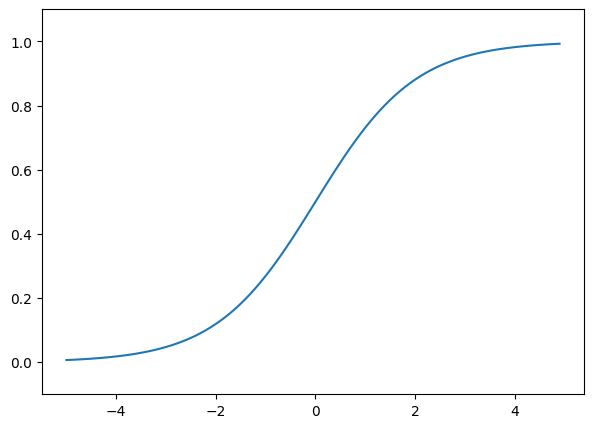

In [7]:
#シグモイド関数の描画
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(x,y)
ax.set_ylim(-0.1, 1.1)

### 3.2.5 シグモイド関数とステップ関数の比較  
シグモイド関数とステップ関数の相違点  
1) シグモイド関数が滑らかな曲線であるのに対し、ステップ関数は急激に出力が変化する。  
2) ステップ関数が0か1の値しか返さないのに対し、シグモイド関数は実数を返す。

シグモイド関数とステップ関数の共通点  
1) どちらも、入力が大きければ大きい値、小さければ小さい値を返す。  
2) 出力範囲が0から1である。

### 3.2.6 非線形関数  
ステップ関数とシグモイド関数の重要な共通点は、非線形関数であること。ニューラルネットワークでは、活性化関数に非線形関数を用いる必要がある(線形関数の場合、層を深くしても、同じことを行う1つの線形関数が存在してしまう)。

### 3.2.7 ReLU関数  
最近では、シグモイド関数に代わって、ReLUという関数が主に用いられている。ReLUは、入力が0を超えていれば値をそのまま出力し、0以下であれば0を出力する。

In [8]:
#ReLU関数の実装
def ReLU(x):
  return np.maximum(0,x)

(-0.1, 5.0)

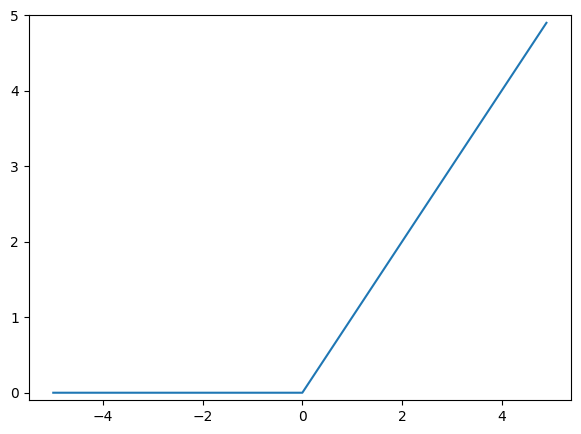

In [9]:
#ReLU関数の描画
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(x,y)
ax.set_ylim(-0.1, 5.0)

## 3.3 多次元配列の計算

### 3.3.1 多次元配列  
略

### 3.3.2 行列の積  


In [10]:
#行列の積はdotで計算できる
A = np.array([[1,2],[3,4]])
print("A.shape : {}".format(A.shape))
B = np.array([[5,6],[7,8]])
print("B.shape : {}".format(B.shape))
print("A * B : {}".format(np.dot(A,B)))

A.shape : (2, 2)
B.shape : (2, 2)
A * B : [[19 22]
 [43 50]]


### 3.3.3 ニューラルネットワークの行列の積  
入力と重みだけからなる簡単なニューラルネットワークの実装をしてみる。

In [11]:
#簡単なニューラルネットワークの実装
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
print("X.shape : {}".format(X.shape))
print("W.shape : {}".format(W.shape))

Y = np.dot(X,W)
print(Y)
print("Y.shape : {}".format(Y.shape))

X.shape : (2,)
W.shape : (2, 3)
[ 5 11 17]
Y.shape : (3,)


## 3.4 3層ニューラルネットワークの実装  
より実践的なニューラルネットワークを実装する。ここでは、入力層に2つ、1つ目の隠れ層に3つ、2つ目の隠れ層に2つ、出力層に2つのニューロンから構成されるニューラルネットワークを考える。

### 3.4.1 記号の確認  
略

### 3.4.2 各層における信号伝達の実装  


In [12]:
#第一層目の重み付き和を求める(値は適当な数字)
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print("X.shape : {}".format(X.shape))
print("W1.shape : {}".format(W1.shape))
print("B1.shape : {}".format(B1.shape))

A1 = np.dot(X,W1)+B1
print("A1 : {}".format(A1))

X.shape : (2,)
W1.shape : (2, 3)
B1.shape : (3,)
A1 : [0.3 0.7 1.1]


In [13]:
#活性化関数を適用する
Z1 = sigmoid(A1)
print("Z1 : {}".format(Z1))

Z1 : [0.57444252 0.66818777 0.75026011]


In [14]:
#第一層目から第二層目の実装を行う
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print("Z1.shape : {}".format(Z1.shape))
print("W2.shape : {}".format(W2.shape))
print("B2.shape : {}".format(B2.shape))

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

Z1.shape : (3,)
W2.shape : (3, 2)
B2.shape : (2,)


In [15]:
#第二層目から出力層への信号伝達

#活性化関数には恒等関数を用いる
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3)
Y = identity_function(A3)

### 3.4.3 実装のまとめ  
ここまでに見てきた3層ニューラルネットワークの実装をまとめる。

In [16]:
#init_network : 重みとバイアスの初期化
def init_network():
  network = {}
  network["W1"] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
  network["b1"] = np.array([0.1, 0.2, 0.3])
  network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network["b2"] = np.array([0.1, 0.2])
  network["W3"] = np.array([[0.1, 0.3],[0.2, 0.4]])
  network["b3"] = np.array([0.1,0.2])

  return network

#forword : 入力が出力へと変換されるプロセスを実装
def forward(network, x):
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]

  a1 = np.dot(X, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np. dot(z2, W3) + b3
  y = identity_function(a3)

  return y

## 3.5 出力層の設計  
ニューラルネットワークでは、分類問題か回帰問題かで出力層の活性化関数を変更する必要がある。一般的に、回帰問題では恒等関数、分類問題ではソフトマックス関数を使う。

### 3.5.1 恒等関数とソフトマックス関数  
恒等関数は、入力をそのまま出力する。一方、ソフトマックス関数は、  
$y_k = \frac{exp(a_k)}{\sum\exp(a_i)}$  
で表される。  

実装してみる。

In [17]:
#ソフトマックス関数の実装
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [18]:
#確認
a = np.array([0.3, 2.9, 4.0])
print("soft_max(a) : {}".format(softmax(a)))

soft_max(a) : [0.01821127 0.24519181 0.73659691]


### 3.5.2 ソフトマックス関数の実装上の注意  
ソフトマックス関数のナイーブな実装では、オーバーフローの恐れがある。ソフトマックス関数の計算結果は、定数を足し算しても変わらないことを利用してオーバーフローしないように実装する。  

In [19]:
#ソフトマックス関数の実装
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [20]:
#確認
a = np.array([1010, 1000, 990])
print("soft_max(a) : {}".format(softmax(a)))

soft_max(a) : [9.99954600e-01 4.53978686e-05 2.06106005e-09]


### 3.5.3 ソフトマックス関数の特徴  
ソフトマックス関数の出力は、0から1の間の実数になる。また、出力の総和は1になる。出力の総和が1になる性質から、ソフトマックス関数の出力を「確率」として解釈することができる。

### 3.5.4 出力層のニューロンの数  
出力層のニューロンの数は、解くべき問題に応じて決める必要がある。例えば、クラス分類タスクの場合、ニューロンの数は分類したいクラスの数に設定する。

## 3.6 手書き数字認識

### 3.6.1 MNISTデータセット  
MNISTデータセット : 機械学習の分野で広く用いられるデータセット。0から9までの数字画像で構成される画像認識用のデータセット。画像データは28 x 28のグレー画像で、それぞれ対応するラベルが付けられている。

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# mnist.pyをインポート
import sys, os
sys.path.append("/content/drive/MyDrive/Colab Notebooks/ゼロから作るDeep Learning")
from mnist import load_mnist

In [23]:
#データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

In [24]:
#各データの形状を確認
print("x_train.shape {}".format(x_train.shape))
print("t_train.shape {}".format(t_train.shape))
print("x_test.shape {}".format(x_test.shape))
print("t_test.shape {}".format(t_test.shape))

x_train.shape (60000, 784)
t_train.shape (60000,)
x_test.shape (10000, 784)
t_test.shape (10000,)


データの確認も兼ねて画像を表示してみる。

In [25]:
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img)) #メモリ削減のため8ビット整数にしている?
  display(pil_img)

img = x_train[0]
label = t_train[0]
print("label : {}".format(label))

print("img_shape (before) : {}".format(img.shape))
img = img.reshape(28,28) #画像の形状を変換
print("img_shape (after) : {}".format(img.shape))

img_show(img)

label : 5
img_shape (before) : (784,)
img_shape (after) : (28, 28)


### 3.6.2 ニューラルネットワークの推論処理
MNISTデータセットに対して、推論処理を行うニューラルネットワークを実装してみる。ネットワークは、入力層が784個、出力層を10個のニューロンで構成する。

In [26]:
# テストデータ取得
def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = True, one_hot_label=False)
  return x_test, t_test

# 学習済みの重みを読み込む
def init_network():
  with open("drive/MyDrive/Colab Notebooks/ゼロから作るDeep Learning/sample_weight.pkl", "rb") as f:
    network = pickle.load(f)
  return network

#推論
def predict(network, x):
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np. dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [27]:
#実際に推論してみる
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)

  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy : {}".format(float(accuracy_cnt)/len(x)))

Accuracy : 0.9352


93.52 % 正しく分類できた。  

ここでは、normalizeをTrueに設定し、画像の各ピクセルの値が0.0 - 1.0に収まるように変換した。このようにデータをある決まった範囲に変換する処理を正規化という。また、ニューラルネットワークの入力データに対して、何らかの決まった変換を行うことを前処理という。

### 3.6.3 バッチ処理


In [28]:
#画像一枚の入力に対する各層の重みの形状を確認
x, _ = get_data()
network = init_network()
W1, W2, W3 = network["W1"], network["W2"], network["W3"]

print("x.shape : {}".format(x.shape))
print("x[0].shape : {}".format(x[0].shape))
print("W1.shape : {}".format(W1.shape))
print("W2.shape : {}".format(W2.shape))
print("W3.shape : {}".format(W3.shape))

x.shape : (10000, 784)
x[0].shape : (784,)
W1.shape : (784, 50)
W2.shape : (50, 100)
W3.shape : (100, 10)


100枚の画像をまとめて1回のpredictで処理することを考える。この時入力データの形状は100 * 784になる。このようなまとまりのある入力データをバッチと呼ぶ。バッチ処理により、計算時間の削減が期待される。

In [29]:
#バッチ処理を実装する
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis = 1)

  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy : {}".format(float(accuracy_cnt)/len(x)))

Accuracy : 0.9352
